# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Homework 7: Fairness and Bias


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)                           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

<a id="contents"></a>

## Notebook contents

- [**Required reading and data description**](#intro)


- [**Question 1: Data exploration [26 pts]**](#part1)
  - [Solutions](#part1solutions)


- [**Question 2: Baseline modeling [21 pts]**](#part2)
  - [Solutions](#part2solutions)


- [**Question 3: Predicting without using `race` [19 pts]**](#part3)
  - [Solutions](#part3solutions)


- [**Question 4: Classification thresholds and fairness [34 pts]**](#part4)
  - [Solutions](#part4solutions)

<a id="intro"></a>

## Required reading and data description

[Return to contents](#contents)

### Required reading

The required readings for this homework are two articles that report on the effectiveness of and issues surrounding the COMPAS recidivism algorithm used in U.S. courts. One article is published by ProPublica and the other by the MIT Technology Review:

1. Angwin, Julia; Larson, Jeff; Mattu, Surya; Kirchner, Lauren (2016). "Machine Bias: There’s software used across the country to predict future criminals. And it’s biased against blacks." ProPublica, May 23, 2016. https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing


2. Hao, Karen; Stray, Jonathan (2019). "Can you make AI fairer than a judge? Play our courtroom algorithm game: The US criminal legal system uses predictive algorithms to try to make the judicial process less biased. But there’s a deeper problem." MIT Technology Review, October 17, 2019. https://www.technologyreview.com/2019/10/17/75285/ai-fairer-than-judge-criminal-risk-assessment-algorithm/

You will need to read these articles for the sufficient background needed to successfully complete this homework assignment. It may also be useful to refer back to content covered during the mid-semester lecture on ethics: [Lecture 13: EthiCS](https://edstem.org/us/courses/9045/lessons/23452/slides/138052).

### Data description

In this assignment, we will be analyzing a portion of the data set used by ProPublica in their report. The data are found in the `compas.csv` file and the "data dictionary", which very briefly explains each variable in the data set, can be found in the `compas_datadict.csv` file.

<a id="part1"></a>

## <div class='exercise'>Question 1: Data exploration [26 pts]</div> 
    
[Return to contents](#contents)

**1.1** What is the statistical objective of the COMPAS algorithm?  How is recidivism prediction used in courtrooms?

**1.2** Consider the information in the provided `compas_datadict.csv`.  Which variables are raw data?  Which are pre-processed data?  Which is the target variable of the COMPAS algorithm?  Which are output(s) of the COMPAS algorithm?   Which should not be used in building our own model to predict recidivism?  

**1.3** Read-in the data and split it into 80% training and 20% test **stratified by `race`** (use `random_state=50`). Before splitting, you may want to process the categorical predictors `c_charge_degree`, `race`, and `sex` first so you don't have to do it separately in train and test later.

**1.4** Now we will do a little EDA. Provide visuals to explore which **unprocessed** quantitative variables, including `decile_score` (**not** the derived binary variables or pre-processed versions of the available quantitative variables, for example), are related to `race`.

**HINT:** You may find your Question 1.4 visuals to be more legible and Question 1.5 easier to answer by grouping your non-Caucasion and non-African-American observations together as "all other" racial groups in your plots. However, if you choose to do so, this should only be a temporary grouping of those observations for plotting purposes. Your actual observations should NOT be grouped.

**1.5** Based on your visuals, report which 3 variables appear to have the most significant differences between Caucasians and African Americans. Briefly interpret your findings for each of those 3 variables, being certain to explain your justification for choosing each.

**NOTE:** As illustrated by [the required readings](#intro), reporting on the U.S. Criminal Justice system often concentrates on the disparate experiences between Caucasians and African Americans, thus we have focused our approaches similarly. However, to ensure the efficacy of our models in Question 2 and Question 3, we must be certain to still keep observations for all racial groups included in our data. 

**1.6** With respect to these 3 chosen variables, how could bias in the data or data collection be impacting or causing these differences?

<a id="part1solutions"></a>

## Question 1: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**1.1** What is the statistical objective of the COMPAS algorithm?  How is recidivism prediction used in courtrooms?

</div>

**COMPAS algorithm was created to improve the leading risk assessment score, the LSI. It assesses the crime risk and several “criminogenic needs” that relate to the major theories of criminality.” It is supposed to help judges determine whether a defendant should be kept in jail or be allowed out while awaiting trial.**

<div class='exercise-r'>

**1.2** Consider the information in the provided `compas_datadict.csv`.  Which variables are raw data?  Which are pre-processed data?  Which is the target variable of the COMPAS algorithm?  Which are output(s) of the COMPAS algorithm?   Which should not be used in building our own model to predict recidivism?

</div>

**Raw data should be age, c_charge_desc,length_of_stay, race, sex, priors_count, docile_score, and score_text based on algorithm output. The pre-processed data should be c_charge_degree based on judges' description, the length_of_stay_threshood, indicator variables of prior_count, indicator variables of juv_fel_count, juv_misd_count and juv_other_count, and the indicator variables derived from c_charge_degree. The target variable of the COMPAS algorithm can be all of them except for those already been converted to dummy variable. The output of the COMPAS algorithm is two_year_recid. Race should not be used in building a model to predict recidivism.**

<div class='exercise-r'>

**1.3** Read-in the data and split it into 80% training and 20% test **stratified by `race`** (use `random_state=50`). Before splitting, you may want to process the categorical predictors `c_charge_degree`, `race`, and `sex` first so you don't have to do it separately in train and test later.

</div>

In [3]:
# your code here
data = pd.read_csv("data/compas.csv")

data1 = data.drop(columns = ['c_charge_degree', 'sex'])
dummy = pd.get_dummies(data[['c_charge_degree', 'race', 'sex']],drop_first = True)
newdata = pd.concat([dummy,data1],axis=1)
# newdata.head()

Y = newdata['two_year_recid']
X = newdata.drop(columns = ['two_year_recid'])

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=50, stratify=X["race"])

<div class='exercise-r'>

**1.4** Now we will do a little EDA. Provide visuals to explore which **unprocessed** quantitative variables, including `decile_score` (**not** the derived binary variables or pre-processed versions of the available quantitative variables, for example), are related to `race`.

**HINT:** You may find your Question 1.4 visuals to be more legible and Question 1.5 easier to answer by grouping your non-Caucasion and non-African-American observations together as "all other" racial groups in your plots. However, if you choose to do so, this should only be a temporary grouping of those observations for plotting purposes. Your actual observations should NOT be grouped.

</div>

/Users/dizhen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dizhen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dizhen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


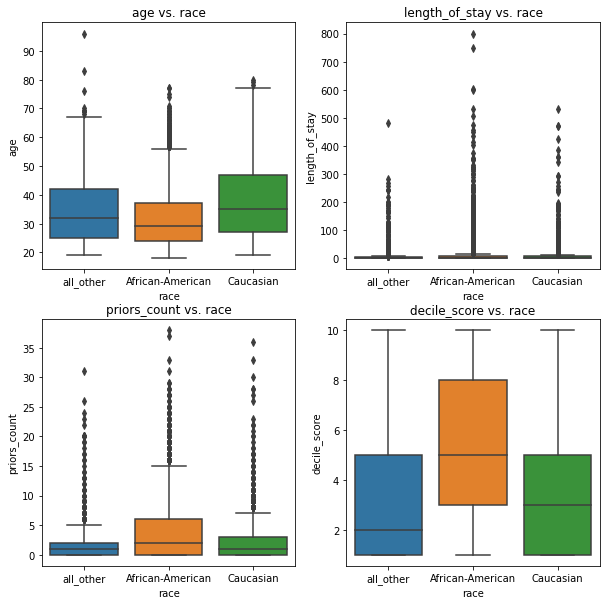

In [4]:
# your code here
data1_4 = data.copy()
data1_4.loc[(data1_4.race != "Caucasian") & (data1_4.race != "African-American"), 'race'] = "all_other"

continuous =  ["age", "length_of_stay", "priors_count", "decile_score"]
fig, axes = plt.subplots(2,2, figsize = (10,10))
axes = axes.ravel()
for i, col in enumerate(continuous):
    sns.boxplot(data1_4['race'], data1_4[col], ax = axes[i])
    axes[i].set_title(f"{col} vs. race")

<div class='exercise-r'>

**1.5** Based on your visuals, report which 3 variables appear to have the most significant differences between Caucasians and African Americans. Briefly interpret your findings for each of those 3 variables, being certain to explain your justification for choosing each.

**NOTE:** As illustrated by [the required readings](#intro), reporting on the U.S. Criminal Justice system often concentrates on the disparate experiences between Caucasians and African Americans, thus we have focused our approaches similarly. However, to ensure the efficacy of our models in Question 2 and Question 3, we must be certain to still keep observations for all racial groups included in our data. 

</div>

**Age, length of stay, and prior count have the most significant differences between Caucassians and African Americans. Caucasian offenders are older than African-American offenders on average. African-American offenders have more prior times of being charged than Caucasian offenders on average. African-American offenders have higher decile score than caucasian offenders on average.**

<div class='exercise-r'>

**1.6** With respect to these 3 chosen variables, how could bias in the data or data collection be impacting or causing these differences?

</div>

**The age of offenders might be associated with life expectancy, health condition, or risk of death in custody, so the overall age could be smaller if the older people are died. If the offender's prior times of being charged are in the other country/region/state, the data might not be collected, so the prior count could be smaller than the true number.**

---

<a id="part2"></a>

## <div class="exercise">Question 2: Baseline modeling [21 pts]</div> 
    
[Return to contents](#contents)

**2.1**  Build a well-tuned $LASSO$-like regularized logistic regression model to predict recidivism (i.e. `two_year_recid` is your response variable). Use the following predictors: `age`, `priors_1`, `priors_234`, `priors_5plus`, `juv_fel_1plus`, `juv_misd_1plus`, `juv_other_1plus`, `charge_any_drug`, `charge_any_violence_aggression`, `charge_any_theft`, as well as your one-hot-encoded predictors for `c_charge_degree`, `sex`, and `race`. Report your resulting coefficients and interpret what this model is saying about the relationship of `two_year_recid` to `race`.


**2.2**  Report the following on the **test set**:

1. **Overall model accuracy score**


2. **False positive rates (FPR)** for each of the two groups (please note that a "positive" here is `two_year_recid==1`)
    - `African-American`
    - `Cacausian`
    
    
3. **False negative rates (FNR)** for each of the two groups:
    - `African-American`
    - `Caucasian`


4. **Ratios of error rates**:
    - Ratio of the FPR between `African-American` and `Caucasian` groups
    - Ratio of the FNR between `African-American` and `Caucasian` groups
    - These ratios can be expressed as:

$$\frac{FPR(AA)}{FPR(CC)} \; \text{and} \; \frac{FNR(AA)}{FNR(CC)}$$


**2.3**  What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups? What are the implications of your findings? Explain your findings in 3-6 sentences.
    
  

<a id="part2solutions"></a>

## Question 2: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**2.1**  Build a well-tuned $LASSO$-like regularized logistic regression model to predict recidivism (i.e. `two_year_recid` is your response variable). Use the following predictors: `age`, `priors_1`, `priors_234`, `priors_5plus`, `juv_fel_1plus`, `juv_misd_1plus`, `juv_other_1plus`, `charge_any_drug`, `charge_any_violence_aggression`, `charge_any_theft`, as well as your one-hot-encoded predictors for `c_charge_degree`, `sex`, and `race`. Report your resulting coefficients and interpret what this model is saying about the relationship of `two_year_recid` to `race`.

</div>

In [5]:
# your code here
predictors = ["age", "priors_1", "priors_234", "priors_5plus", "juv_fel_1plus", 
              "juv_misd_1plus", "juv_other_1plus", "charge_any_drug", 
              "charge_any_violence_aggression", "charge_any_theft"]

dummy = list(newdata.columns[0:7])
all_variables = dummy + predictors

lrCV = LogisticRegressionCV(cv=5, penalty='l1', solver = 'liblinear').fit(X_train[all_variables], y_train)

# for var, coef in zip(all_variables[1:6], lrCV.coef_[0][1:6].tolist()):
#     print(f"The coefficient for {var} is {coef:.5f}. The OR for {var} is {np.exp(coef):.5f}.")
    
for var, coef in zip(all_variables, lrCV.coef_[0].tolist()):
    print(f"The coefficient for {var} is {coef:.5f}. The OR for {var} is {np.exp(coef):.5f}.")
    

The coefficient for c_charge_degree_M is -0.12438. The OR for c_charge_degree_M is 0.88305.
The coefficient for race_Asian is -0.59631. The OR for race_Asian is 0.55084.
The coefficient for race_Caucasian is -0.09258. The OR for race_Caucasian is 0.91158.
The coefficient for race_Hispanic is -0.24909. The OR for race_Hispanic is 0.77951.
The coefficient for race_Native American is -0.25527. The OR for race_Native American is 0.77470.
The coefficient for race_Other is -0.13772. The OR for race_Other is 0.87134.
The coefficient for sex_Male is 0.34619. The OR for sex_Male is 1.41367.
The coefficient for age is -0.03633. The OR for age is 0.96432.
The coefficient for priors_1 is 0.35653. The OR for priors_1 is 1.42837.
The coefficient for priors_234 is 0.87969. The OR for priors_234 is 2.41014.
The coefficient for priors_5plus is 1.69596. The OR for priors_5plus is 5.45185.
The coefficient for juv_fel_1plus is 0.17935. The OR for juv_fel_1plus is 1.19644.
The coefficient for juv_misd_1plu

**INTERPRETATION:**

**The coefficients are all negative and the ORs are all lower than 1. Because the reference group is "African_American", this means that compared to African-American offenders, others are less likely to be recidivated in 2 years. 
The odds of being recidivated in 2 years among Asian offenders is 0.55084 times the odds of being recidivated in 2 years among African-American offenders. 
The odds of being recidivated in 2 years among Caucasian offenders is 0.91156 times the odds of being recidivated in 2 years among African-American offenders. 
The odds of being recidivated in 2 years among Hispanic offenders is 0.77949 times the odds of being recidivated in 2 years among African-American offenders. 
The odds of being recidivated in 2 years among Native American offenders is 0.77470 times the odds of being recidivated in 2 years among African-American offenders. 
The odds of being recidivated in 2 years among Other offenders is 0.87134 times the odds of being recidivated in 2 years among African-American offenders.**

<div class='exercise-r'>

**2.2**  Report the following on the **test set**:

1. **Overall model accuracy score**


2. **False positive rates (FPR)** for each of the two groups (please note that a "positive" here is `two_year_recid==1`)
    - `African-American`
    - `Cacausian`
    
    
3. **False negative rates (FNR)** for each of the two groups:
    - `African-American`
    - `Caucasian`


4. **Ratios of error rates**:
    - Ratio of the FPR between `African-American` and `Caucasian` groups
    - Ratio of the FNR between `African-American` and `Caucasian` groups
    - These ratios can be expressed as:

$$\frac{FPR(AA)}{FPR(CC)} \; \text{and} \; \frac{FNR(AA)}{FNR(CC)}$$

</div>

In [6]:
# your code here

# Overall accuracy score
test_acc = lrCV.score(X_test[all_variables], y_test)
print(f"1) The overall accuracy score is {test_acc:.5f}.")

# African American
race_AA = X_test[X_test['race'] == "African-American"]
ind_A = race_AA.index
y_pred_AA = lrCV.predict(race_AA[all_variables])

confM = confusion_matrix(y_test[ind_A], y_pred_AA)

# FP FN TP TN
FP = confM[0,1]
FN = confM[1,0]
TP = confM[1,1]
TN = confM[0,0]

# False positive rate
FPR_AA = FP/(FP+TN)

# False negative rate
FNR_AA = FN/(TP+FN)

# Caucasian
race_C = X_test[X_test['race'] == "Caucasian"]
ind_C = race_C.index
y_pred_C = lrCV.predict(race_C[all_variables])

confM = confusion_matrix(y_test[ind_C], y_pred_C)

# FP FN TP TN
FP = confM[0,1]
FN = confM[1,0]
TP = confM[1,1]
TN = confM[0,0]

# Sensitivity, or True positive rate
FPR_C = FP/(FP+TN)

# False negative rate
FNR_C = FN/(TP+FN)

print(f"2) The FPR for African-American is {FPR_AA:.5f}. The FPR for Caucasian is {FPR_C:.5f}.")
print(f"3) The FNR for African-American is {FNR_AA:.5f}. The FNR for Caucasian is {FNR_C:.5f}.")

# Ratio between African American and Caucasian
ratio_tpr = FPR_AA/FPR_C
ratio_fnr = FNR_AA/FNR_C

print(f"4) The FPR ratio is {ratio_tpr:.5f}. The FNR ratio is {ratio_fnr:.5f}.")



1) The overall accuracy score is 0.68049.
2) The FPR for African-American is 0.37067. The FPR for Caucasian is 0.19626.
3) The FNR for African-American is 0.27924. The FNR for Caucasian is 0.51220.
4) The FPR ratio is 1.88863. The FNR ratio is 0.54518.


<div class='exercise-r'>

**2.3**  What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups? What are the implications of your findings? Explain your findings in 3-6 sentences.

</div>

**The African-American group has higher FPR. The Caucasion group has higher FNR. This means there are a large portion of African-American offenders being falsely predicted as being recidivated in 2 years while there are a large portion of Caucasian offenders being falsely predicted as not being recidivated in 2 years. This shows that the model is biased since African-American offenders are more likely to be predicted as being recidivated in 2 years.**

---

<a id="part3"></a>

## <div class='exercise'>Question 3: Predicting without using `race` [19 pts]</div> 
    
[Return to contents](#contents)

**3.1** Fit another well-tuned $LASSO$-like regularized logistic regression model just as you did in Question 2.1, but this time **without** `race` as a predictor. Report your resulting coefficients.

**3.2** Again, report the following on the **test set**:

1. **Overall model accuracy score**


2. **False positive rates (FPR)** for each of the two groups (please note that a "positive" here is `two_year_recid==1`)
    - `African-American`
    - `Cacausian`
    
    
3. **False negative rates (FNR)** for each of the two groups:
    - `African-American`
    - `Caucasian`


4. **Ratios of error rates**:
    - Ratio of the FPR between `African-American` and `Caucasian` groups
    - Ratio of the FNR between `African-American` and `Caucasian` groups
    - These ratios can be expressed as:

$$\frac{FPR(AA)}{FPR(CC)} \; \text{and} \; \frac{FNR(AA)}{FNR(CC)}$$


**3.3**  How do these metrics compare to the model when the variable `race` **is** included as a predictor?

**3.4**  Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not? Give careful consideration to why the bias is still occurring or not still occurring in your results and what the real-life implications/effects might be for such a tool.

<a id="part3solutions"></a>

## Question 3: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**3.1** Fit another well-tuned $LASSO$-like regularized logistic regression model just as you did in Question 2.1, but this time **without** `race` as a predictor. Report your resulting coefficients.

</div>

In [7]:
# your code here
predictors = ["age", "priors_1", "priors_234", "priors_5plus", "juv_fel_1plus", 
              "juv_misd_1plus", "juv_other_1plus", "charge_any_drug", 
              "charge_any_violence_aggression", "charge_any_theft"]
dummy = list(newdata.columns[[0,6]])
all_variables = dummy + predictors

lrCV = LogisticRegressionCV(cv=5, penalty='l1', solver = 'liblinear').fit(X_train[all_variables], y_train)

for var, coef in zip(all_variables, lrCV.coef_[0].tolist()):
    print(f"The coefficient for {var} is {coef:.5f}. The OR for {var} is {np.exp(coef):.5f}.")

The coefficient for c_charge_degree_M is -0.13056. The OR for c_charge_degree_M is 0.87760.
The coefficient for sex_Male is 0.34445. The OR for sex_Male is 1.41122.
The coefficient for age is -0.03691. The OR for age is 0.96377.
The coefficient for priors_1 is 0.37137. The OR for priors_1 is 1.44972.
The coefficient for priors_234 is 0.90140. The OR for priors_234 is 2.46304.
The coefficient for priors_5plus is 1.73456. The OR for priors_5plus is 5.66643.
The coefficient for juv_fel_1plus is 0.19700. The OR for juv_fel_1plus is 1.21774.
The coefficient for juv_misd_1plus is 0.15206. The OR for juv_misd_1plus is 1.16423.
The coefficient for juv_other_1plus is 0.54985. The OR for juv_other_1plus is 1.73299.
The coefficient for charge_any_drug is 0.32806. The OR for charge_any_drug is 1.38827.
The coefficient for charge_any_violence_aggression is 0.10428. The OR for charge_any_violence_aggression is 1.10991.
The coefficient for charge_any_theft is 0.38205. The OR for charge_any_theft is 1

<div class='exercise-r'>

**3.2** Again, report the following on the **test set**:

1. **Overall model accuracy score**


2. **False positive rates (FPR)** for each of the two groups (please note that a "positive" here is `two_year_recid==1`)
    - `African-American`
    - `Cacausian`
    
    
3. **False negative rates (FNR)** for each of the two groups:
    - `African-American`
    - `Caucasian`


4. **Ratios of error rates**:
    - Ratio of the FPR between `African-American` and `Caucasian` groups
    - Ratio of the FNR between `African-American` and `Caucasian` groups
    - These ratios can be expressed as:

$$\frac{FPR(AA)}{FPR(CC)} \; \text{and} \; \frac{FNR(AA)}{FNR(CC)}$$

</div>

In [8]:
# your code here
# Overall accuracy score
test_acc = lrCV.score(X_test[all_variables], y_test)
print(f"1) The overall accuracy score is {test_acc:.5f}.")

# African American
race_AA = X_test[X_test['race'] == "African-American"]
ind_A = race_AA.index
y_pred_AA = lrCV.predict(race_AA[all_variables])

confM = confusion_matrix(y_test[ind_A], y_pred_AA)

# FP FN TP TN
FP = confM[0,1]
FN = confM[1,0]
TP = confM[1,1]
TN = confM[0,0]

# False positive rate
FPR_AA = FP/(FP+TN)

# False negative rate
FNR_AA = FN/(TP+FN)

# Caucasian
race_C = X_test[X_test['race'] == "Caucasian"]
ind_C = race_C.index
y_pred_C = lrCV.predict(race_C[all_variables])

confM = confusion_matrix(y_test[ind_C], y_pred_C)

# FP FN TP TN
FP = confM[0,1]
FN = confM[1,0]
TP = confM[1,1]
TN = confM[0,0]

# Sensitivity, or True positive rate
FPR_C = FP/(FP+TN)

# False negative rate
FNR_C = FN/(TP+FN)

print(f"2) The FPR for African-American is {FPR_AA:.5f}. The FPR for Caucasian is {FPR_C:.5f}.")
print(f"3) The FNR for African-American is {FNR_AA:.5f}. The FNR for Caucasian is {FNR_C:.5f}.")

# Ratio between African American and Caucasian
ratio_tpr = FPR_AA/FPR_C
ratio_fnr = FNR_AA/FNR_C

print(f"4) The FPR ratio is {ratio_tpr:.5f}. The FNR ratio is {ratio_fnr:.5f}.")



1) The overall accuracy score is 0.68244.
2) The FPR for African-American is 0.35200. The FPR for Caucasian is 0.20561.
3) The FNR for African-American is 0.29356. The FNR for Caucasian is 0.49756.
4) The FPR ratio is 1.71200. The FNR ratio is 0.58999.


<div class='exercise-r'>

**3.3**  How do these metrics compare to the model when the variable `race` **is** included as a predictor?

</div>

**When the race variable is not included as a predictor, the FPR ratio between African-American and Caucasian becomes smaller. The FNR ratio between African-American and Caucasian becomes larger.**

<div class='exercise-r'>

**3.4**  Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not? Give careful consideration to why the bias is still occurring or not still occurring in your results and what the real-life implications/effects might be for such a tool.

</div>

**No, even if the race variable is not used, the predictive tool is not trustable to be unbiased, because African-American offenders are still more likely to be falsely predicted as being recidivated in 2 years and the Caucasian offenders are still more likely to be falsely predicted as being not recidivated in 2 years. The bias is still occurring because some variables are correlated with race. And we couldn't remove them, because that would reduce the accuracy of the model. To make the tool less biased, it's not desirable to remove variables that can potentially bias the model, instead, we might resort to other method to reduce biases such as changing the threshold.**

---

<a id="part4"></a>

## <div class='exercise'>Question 4: Classification thresholds and fairness [34 pts]</div> 
    
[Return to contents](#contents)

**4.1** Use the logistic regression model from Question 3.1 and plot the Receiver Operating Characteristic (ROC) curves for two racial groups: `African-American` and `Caucasian` in the **training set**.
    
**4.2** The default threshold used for determining the classification metrics analyzed in Question 2.2 and Question 3.2 was $\hat{p}=0.5$.  Choose a new single threshold for the model from Question 3.1 that will reduce the bias between these two racial groups as measured by the "Ratios of Error Rates" (as defined by the formulas shown in Question 3.2). Be certain to justify your choice and interpet how this threshold choice affects your model results.

**HINT:** There is no one correct answer here. However, to arrive at an answer you can support with an evidence-based justification, you will likely need to inspect the "Ratio of $FPR$", "Ratio of $FNR$", and accuracy trends across varying classification thresholds. There should be no need to refit your model from Question 3.1 to accomplish this task.

**4.3** A second approach to reducing bias is to use different thresholds for the different racial groups to better ensure that the individual groups have similar false positive and false negative rates.  Choose a pair of thresholds (one for the `African-American` group and one for the `Caucasian` group) that improves the group bias (while still taking accuracy into consideration). Be certain to justify your choices and interpet how these threshold choices affect your model results.

**HINT:** To arrive at an answer you can support with an evidence-based justification, you will likely need to inspect $FPR$, $FNR$, and accuracy trends across varying classification thresholds for each group (`African-American` and `Caucasian`) individually. There should be no need to refit your model from Question 3.1 to accomplish this task.

**4.4** Comment on [the fairness](<https://en.wikipedia.org/wiki/Fairness_(machine_learning)>) of the two methods in Question 4.2 and Question 4.3 from two different perspectives: the fairness of each group (called "group fairness") and the fairness for an individual defendant (called "individual fairness"). 

**4.5** Changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **fair**.  What can be done to balance these two criteria?  Write down your strategy to overcome this difficulty. Please limit your response to at most 150 words.  
     

<a id="part4solutions"></a>

## Question 4: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**4.1** Use the logistic regression model from Question 3.1 and plot the Receiver Operating Characteristic (ROC) curves for two racial groups: `African-American` and `Caucasian` in the **training set**.

</div>

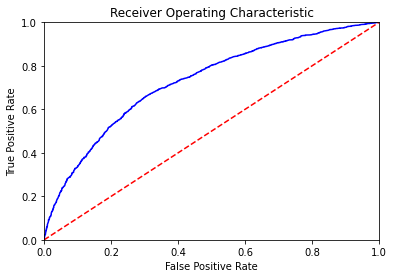

In [9]:
# your code here
train_prob = lrCV.predict_proba(X_train[all_variables])
fpr, tpr, threshold = roc_curve(y_train, train_prob[:,1])

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<div class='exercise-r'>

**4.2** The default threshold used for determining the classification metrics analyzed in Question 2.2 and Question 3.2 was $\hat{p}=0.5$.  Choose a new single threshold for the model from Question 3.1 that will reduce the bias between these two racial groups as measured by the "Ratios of Error Rates" (as defined by the formulas shown in Question 3.2). Be certain to justify your choice and interpet how this threshold choice affects your model results.

**HINT:** There is no one correct answer here. However, to arrive at an answer you can support with an evidence-based justification, you will likely need to inspect the "Ratio of $FPR$", "Ratio of $FNR$", and accuracy trends across varying classification thresholds. There should be no need to refit your model from Question 3.1 to accomplish this task.

</div>

In [10]:
# your code here
for i in np.linspace(3,7,10):
    threshold = i * 0.1
    print(f"Threshold: {threshold:.5f}.")
    pred = 1*(lrCV.predict_proba(X_test[all_variables])[:,1] > threshold)
    
    # Overall accuracy score
    test_acc = accuracy_score(y_test,pred)
    print(f"1) The overall accuracy score is {test_acc:.5f}.")

    # African American
    race_AA = X_test[X_test['race'] == "African-American"]
    ind_A = race_AA.index
    y_pred_AA = 1*(lrCV.predict_proba(race_AA[all_variables])[:,1] > threshold)

    confM = confusion_matrix(y_test[ind_A], y_pred_AA)

    # FP FN TP TN
    FP = confM[0,1]
    FN = confM[1,0]
    TP = confM[1,1]
    TN = confM[0,0]

    # False positive rate
    FPR_AA = FP/(FP+TN)

    # False negative rate
    FNR_AA = FN/(TP+FN)

    # Caucasian
    race_C = X_test[X_test['race'] == "Caucasian"]
    ind_C = race_C.index
    y_pred_C = 1*(lrCV.predict_proba(race_C[all_variables])[:,1] > threshold)

    confM = confusion_matrix(y_test[ind_C], y_pred_C)

    # FP FN TP TN
    FP = confM[0,1]
    FN = confM[1,0]
    TP = confM[1,1]
    TN = confM[0,0]

    # Sensitivity, or True positive rate
    FPR_C = FP/(FP+TN)

    # False negative rate
    FNR_C = FN/(TP+FN)

    print(f"2) The FPR for African-American is {FPR_AA:.5f}. The FPR for Caucasian is {FPR_C:.5f}.")
    print(f"3) The FNR for African-American is {FNR_AA:.5f}. The FNR for Caucasian is {FNR_C:.5f}.")

    # Ratio between African American and Caucasian
    ratio_tpr = FPR_AA/FPR_C
    ratio_fnr = FNR_AA/FNR_C

    print(f"4) The FPR ratio is {ratio_tpr:.5f}. The FNR ratio is {ratio_fnr:.5f}.")




Threshold: 0.30000.
1) The overall accuracy score is 0.60402.
2) The FPR for African-American is 0.75467. The FPR for Caucasian is 0.59190.
3) The FNR for African-American is 0.05728. The FNR for Caucasian is 0.15122.
4) The FPR ratio is 1.27499. The FNR ratio is 0.37878.
Threshold: 0.34444.
1) The overall accuracy score is 0.63189.
2) The FPR for African-American is 0.66400. The FPR for Caucasian is 0.49221.
3) The FNR for African-American is 0.09308. The FNR for Caucasian is 0.25366.
4) The FPR ratio is 1.34901. The FNR ratio is 0.36695.
Threshold: 0.38889.
1) The overall accuracy score is 0.66105.
2) The FPR for African-American is 0.53067. The FPR for Caucasian is 0.38629.
3) The FNR for African-American is 0.15036. The FNR for Caucasian is 0.33171.
4) The FPR ratio is 1.37374. The FNR ratio is 0.45329.
Threshold: 0.43333.
1) The overall accuracy score is 0.67984.
2) The FPR for African-American is 0.45600. The FPR for Caucasian is 0.31153.
3) The FNR for African-American is 0.1861

**INTERPRETATION:**

**If I choose higher threshold, the model will bias towards higher possibility of falsely predicting African-American offenders to be recidivated in 2 years. If I choose lower threshold, the model will bias towards higher possibility of falsely predicting Caucasian offenders to be not recidivated in 2 years. The accuracy is smaller when choosing too high or too low threshold.**

**I consider FPR to be more important than FNR and I assume this model will be used with the careful evaluation of judges. Then I will choose a threshold of 0.39. With this threshold, the FPR ratio between African-American and Caucasian reduces to 1.37374 and the overall accuracy is 0.66105.**

<div class='exercise-r'>

**4.3** A second approach to reducing bias is to use different thresholds for the different racial groups to better ensure that the individual groups have similar false positive and false negative rates.  Choose a pair of thresholds (one for the `African-American` group and one for the `Caucasian` group) that improves the group bias (while still taking accuracy into consideration). Be certain to justify your choices and interpet how these threshold choices affect your model results.

**HINT:** To arrive at an answer you can support with an evidence-based justification, you will likely need to inspect $FPR$, $FNR$, and accuracy trends across varying classification thresholds for each group (`African-American` and `Caucasian`) individually. There should be no need to refit your model from Question 3.1 to accomplish this task.

</div>

In [11]:
# your code here
for i in np.linspace(3,7,10):
    threshold = i * 0.1
    print(f"Threshold: {threshold:.5f}.")
    pred = 1*(lrCV.predict_proba(X_test[all_variables])[:,1] > threshold)
    
    # Overall accuracy score
    test_acc = accuracy_score(y_test,pred)
    print(f"1) The overall accuracy score is {test_acc:.5f}.")

    # African American
    race_AA = X_test[X_test['race'] == "African-American"]
    ind_A = race_AA.index
    y_pred_AA = 1*(lrCV.predict_proba(race_AA[all_variables])[:,1] > threshold)

    confM = confusion_matrix(y_test[ind_A], y_pred_AA)

    # FP FN TP TN
    FP = confM[0,1]
    FN = confM[1,0]
    TP = confM[1,1]
    TN = confM[0,0]

    # False positive rate
    FPR_AA = FP/(FP+TN)

    # False negative rate
    FNR_AA = FN/(TP+FN)

    # Caucasian
    race_C = X_test[X_test['race'] == "Caucasian"]
    ind_C = race_C.index
    y_pred_C = 1*(lrCV.predict_proba(race_C[all_variables])[:,1] > threshold)

    confM = confusion_matrix(y_test[ind_C], y_pred_C)

    # FP FN TP TN
    FP = confM[0,1]
    FN = confM[1,0]
    TP = confM[1,1]
    TN = confM[0,0]

    # Sensitivity, or True positive rate
    FPR_C = FP/(FP+TN)

    # False negative rate
    FNR_C = FN/(TP+FN)

    print(f"2) The FPR for African-American is {FPR_AA:.5f}. The FPR for Caucasian is {FPR_C:.5f}.")
    print(f"3) The FNR for African-American is {FNR_AA:.5f}. The FNR for Caucasian is {FNR_C:.5f}.")

#     # Ratio between African American and Caucasian
#     ratio_tpr = FPR_AA/FPR_C
#     ratio_fnr = FNR_AA/FNR_C

#     print(f"4) The FPR ratio is {ratio_tpr:.5f}. The FNR ratio is {ratio_fnr:.5f}.")


Threshold: 0.30000.
1) The overall accuracy score is 0.60402.
2) The FPR for African-American is 0.75467. The FPR for Caucasian is 0.59190.
3) The FNR for African-American is 0.05728. The FNR for Caucasian is 0.15122.
Threshold: 0.34444.
1) The overall accuracy score is 0.63189.
2) The FPR for African-American is 0.66400. The FPR for Caucasian is 0.49221.
3) The FNR for African-American is 0.09308. The FNR for Caucasian is 0.25366.
Threshold: 0.38889.
1) The overall accuracy score is 0.66105.
2) The FPR for African-American is 0.53067. The FPR for Caucasian is 0.38629.
3) The FNR for African-American is 0.15036. The FNR for Caucasian is 0.33171.
Threshold: 0.43333.
1) The overall accuracy score is 0.67984.
2) The FPR for African-American is 0.45600. The FPR for Caucasian is 0.31153.
3) The FNR for African-American is 0.18616. The FNR for Caucasian is 0.39024.
Threshold: 0.47778.
1) The overall accuracy score is 0.68114.
2) The FPR for African-American is 0.38933. The FPR for Caucasian 

**INTERPRETATION:**

**I choose 0.52 threshold for Caucasian group and 0.61 threshold for African-American group. Now the FPR for Caucasian group and African-American group is 0.18692 and 0.19733. The FNR for Caucasian group and African-American group is 0.53171 and 0.52745. The FNR ratio between African-American group and Caucasian group are similar, and the FPR ratio between African-American group and Caucasian group are similar. In this way, the model is less biased.**
 

<div class='exercise-r'>

**4.4** Comment on [the fairness](<https://en.wikipedia.org/wiki/Fairness_(machine_learning)>) of the two methods in Question 4.2 and Question 4.3 from two different perspectives: the fairness of each group (called "group fairness") and the fairness for an individual defendant (called "individual fairness"). 

</div>

**There is a trade-off between group fairness and individual fairness. When the threshold is the same for two groups, the group fairness is achieved but the individual fairness is violated, because the two groups share the same threshold but one group has higher FPR and the other has higher FNR. When the threshold is different in order to achieve similar FPR and FNR between two groups, the individual fairness is achieved but the group fairness is violated. This is because the two groups have similar FPR FNR but different threshold.**

<div class='exercise-r'>

**4.5** Changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **fair**.  What can be done to balance these two criteria?  Write down your strategy to overcome this difficulty. Please limit your response to at most 150 words.  

</div>

**The variables should be less related to the race, so we can remove all variables that are highly correlated with race. Human judges and decision-making could help to balance the tradeoff. And I think another good way of increasing accuracy and fairness is to split the data into difference race and train different models for different race group.**

#### THE END

[Return to contents](#contents)